<a href="https://colab.research.google.com/github/Tainaquz/Desafios-Dio.me-Bootcamp-BairesDevp-Machine-Learning-Bai/blob/main/C%C3%B3pia_de_cachorrovsgato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from google.colab import drive
drive.mount('/content/drive')

# Caminho para os dados
pasta = '/content/drive/MyDrive/cats_and_dogs'

# Carregar o dataset
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

# Dividir o dataset em treino e validação (80/20)
train_size = int(0.8 * info.splits['train'].num_examples)
val_size = info.splits['train'].num_examples - train_size

train_dataset = dataset['train'].take(train_size)  # 80% dos dados
validation_dataset = dataset['train'].skip(train_size)  # 20% dos dados

# Verificando tamanhos
print(f'Tamanho do conjunto de treino: {train_size}')
print(f'Tamanho do conjunto de validação: {val_size}')

# Pré-processamento das imagens
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))  # Redimensionar para 224x224
    image = image / 255.0  # Normalizar entre 0 e 1
    return image, label

# Aplicar o pré-processamento
train_dataset = train_dataset.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.map(preprocess_image).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Transfer Learning com MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Congelar a base

# Modelo
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Classificação binária
])

# Compilação
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento
model.fit(train_dataset, epochs=3, validation_data=validation_dataset)

# Avaliação
test_loss, test_acc = model.evaluate(validation_dataset)
print("Acurácia no teste:", test_acc)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tamanho do conjunto de treino: 18609
Tamanho do conjunto de validação: 4653
Epoch 1/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 1086s 2s/step - accuracy: 0.9227 - loss: 0.1679 - val_accuracy: 0.9837 - val_loss: 0.0476
Epoch 2/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 1024s 2s/step - accuracy: 0.9847 - loss: 0.0436 - val_accuracy: 0.9839 - val_loss: 0.0436
Epoch 3/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 1075s 2s/step - accuracy: 0.9870 - loss: 0.0378 - val_accuracy: 0.9847 - val_loss: 0.0424
146/146 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.9832 - loss: 0.0498
Acurácia no teste: 0.9847410321235657


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


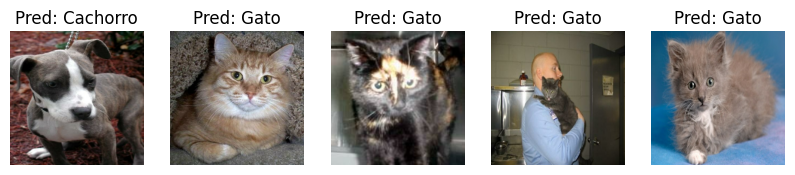

In [ ]:
import matplotlib.pyplot as plt

# Mostrar algumas imagens de teste com suas previsões
def show_predictions(dataset, model, num_images=5):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):  # Pegue 1 batch do dataset
        predictions = model.predict(images)
        for i in range(num_images):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i].numpy())
            predicted_label = 'Gato' if predictions[i] < 0.5 else 'Cachorro'
            plt.title(f'Pred: {predicted_label}')
            plt.axis('off')
    plt.show()

# Mostrar previsões no conjunto de validação
show_predictions(validation_dataset, model)
